In [62]:
import pandas as pd
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as plt
from graphviz import Source
from IPython.display import HTML
from IPython.display import SVG
from sklearn.model_selection import train_test_split
style = "<style>svg{width:10% !important;height:10% !important;}</style>"
HTML(style)

In [4]:
#read data
data = pd.read_csv('~/HeartDiseaseData.csv', index_col = [0])
data.head()

,ID,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num,Place
1,1,28,male,atypical angina,130.0,132.0,False,showing probable or definite left ventricular ...,185.0,no,0.0,0,Hungary
2,2,29,male,atypical angina,120.0,243.0,False,normal,160.0,no,0.0,0,Hungary
3,3,29,male,atypical angina,140.0,NaN,False,normal,170.0,no,0.0,0,Hungary
4,4,30,female,typical angina,170.0,237.0,False,having ST-T wave abnormality (T wave inversion...,170.0,no,0.0,0,Hungary
5,5,31,female,atypical angina,100.0,219.0,False,having ST-T wave abnormality (T wave inversion...,150.0,no,0.0,0,Hungary


In [5]:
#basic statistics
data.shape

(457, 13)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 457 entries, 1 to 457
Data columns (total 13 columns):
ID          457 non-null int64
Age         457 non-null int64
Sex         457 non-null object
cp          457 non-null object
trestbps    424 non-null float64
chol        431 non-null float64
fbs         403 non-null object
restecg     455 non-null object
thalach     424 non-null float64
exang       424 non-null object
oldpeak     421 non-null float64
num         457 non-null int64
Place       457 non-null object
dtypes: float64(4), int64(3), object(6)
memory usage: 50.0+ KB


In [10]:
data.sort_values(by='Age', ascending=True).head()

,ID,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num,Place
1,1,28,male,atypical angina,130.0,132.0,False,showing probable or definite left ventricular ...,185.0,no,0.0,0,Hungary
2,2,29,male,atypical angina,120.0,243.0,False,normal,160.0,no,0.0,0,Hungary
3,3,29,male,atypical angina,140.0,NaN,False,normal,170.0,no,0.0,0,Hungary
4,4,30,female,typical angina,170.0,237.0,False,having ST-T wave abnormality (T wave inversion...,170.0,no,0.0,0,Hungary
189,189,31,male,asymptomatic,120.0,270.0,False,normal,153.0,yes,1.5,1,Hungary


In [11]:
data.describe()

,ID,Age,trestbps,chol,thalach,oldpeak,num
count,457.000000,457.000000,424.000000,431.000000,424.000000,421.000000,457.000000
mean,229.000000,50.962801,131.488208,200.048724,134.910377,0.622090,0.459519
std,132.068795,9.219588,18.829454,113.463794,24.251177,0.922115,0.498905
min,1.000000,28.000000,80.000000,0.000000,69.000000,-2.600000,0.000000
25%,115.000000,45.000000,120.000000,171.000000,118.000000,0.000000,0.000000
50%,229.000000,52.000000,130.000000,220.000000,135.000000,0.000000,0.000000
75%,343.000000,57.000000,140.000000,269.500000,150.000000,1.000000,1.000000
max,457.000000,75.000000,200.000000,603.000000,190.000000,5.000000,1.000000


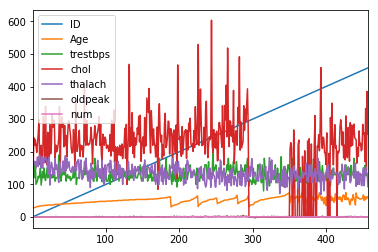

In [13]:
data = data.fillna(data.median())
data.plot()

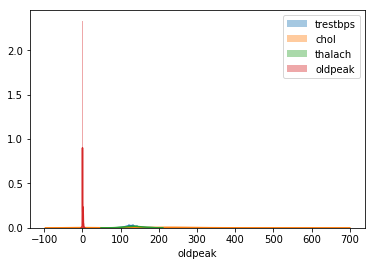

In [21]:
data_numeric = data.select_dtypes(include=['float'])
data_numeric.head()
for column in data_numeric:
    sns.distplot(data[str(column)], label = column)
plt.legend()

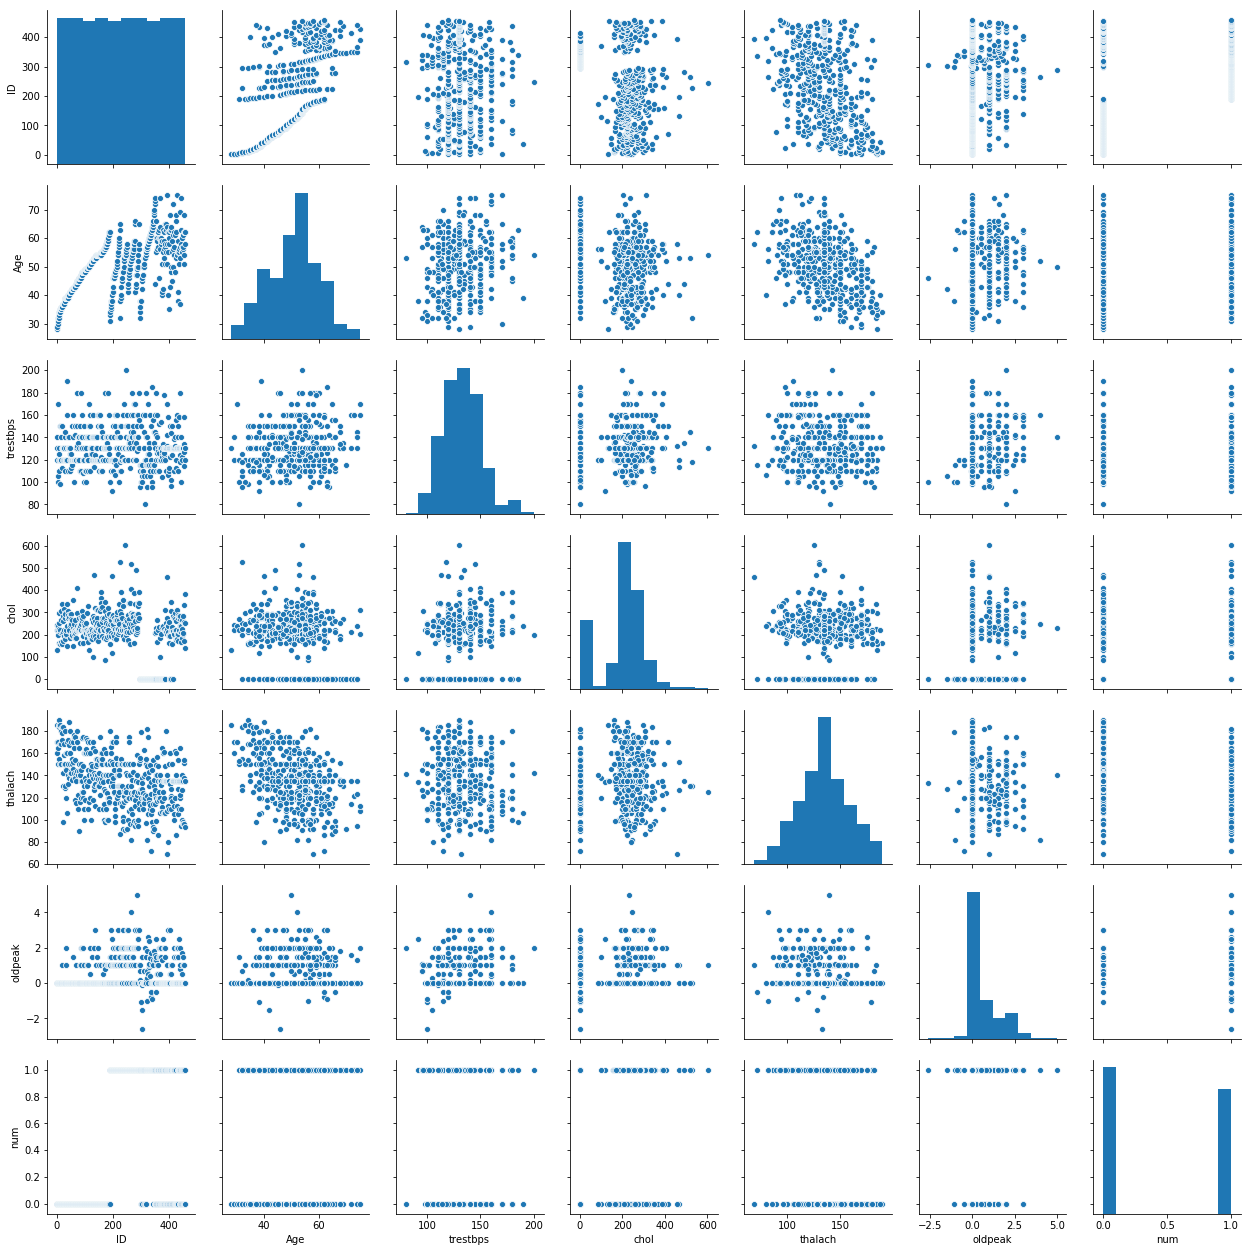

In [34]:
data_num= data.select_dtypes(include=['int', 'float'])
sns.pairplot(data_num)

In [39]:
data_drop = data.drop(['ID','num'], axis=1)
data_drop.head()

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,Place
1,28,male,atypical angina,130.0,132.0,False,showing probable or definite left ventricular ...,185.0,no,0.0,Hungary
2,29,male,atypical angina,120.0,243.0,False,normal,160.0,no,0.0,Hungary
3,29,male,atypical angina,140.0,220.0,False,normal,170.0,no,0.0,Hungary
4,30,female,typical angina,170.0,237.0,False,having ST-T wave abnormality (T wave inversion...,170.0,no,0.0,Hungary
5,31,female,atypical angina,100.0,219.0,False,having ST-T wave abnormality (T wave inversion...,150.0,no,0.0,Hungary


In [43]:
#get values for the tree
data = pd.get_dummies(data)
X = data.drop('num', axis=1)
y = data.num

In [44]:
#first classifier
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [45]:
clf.score(X, y)

1.0

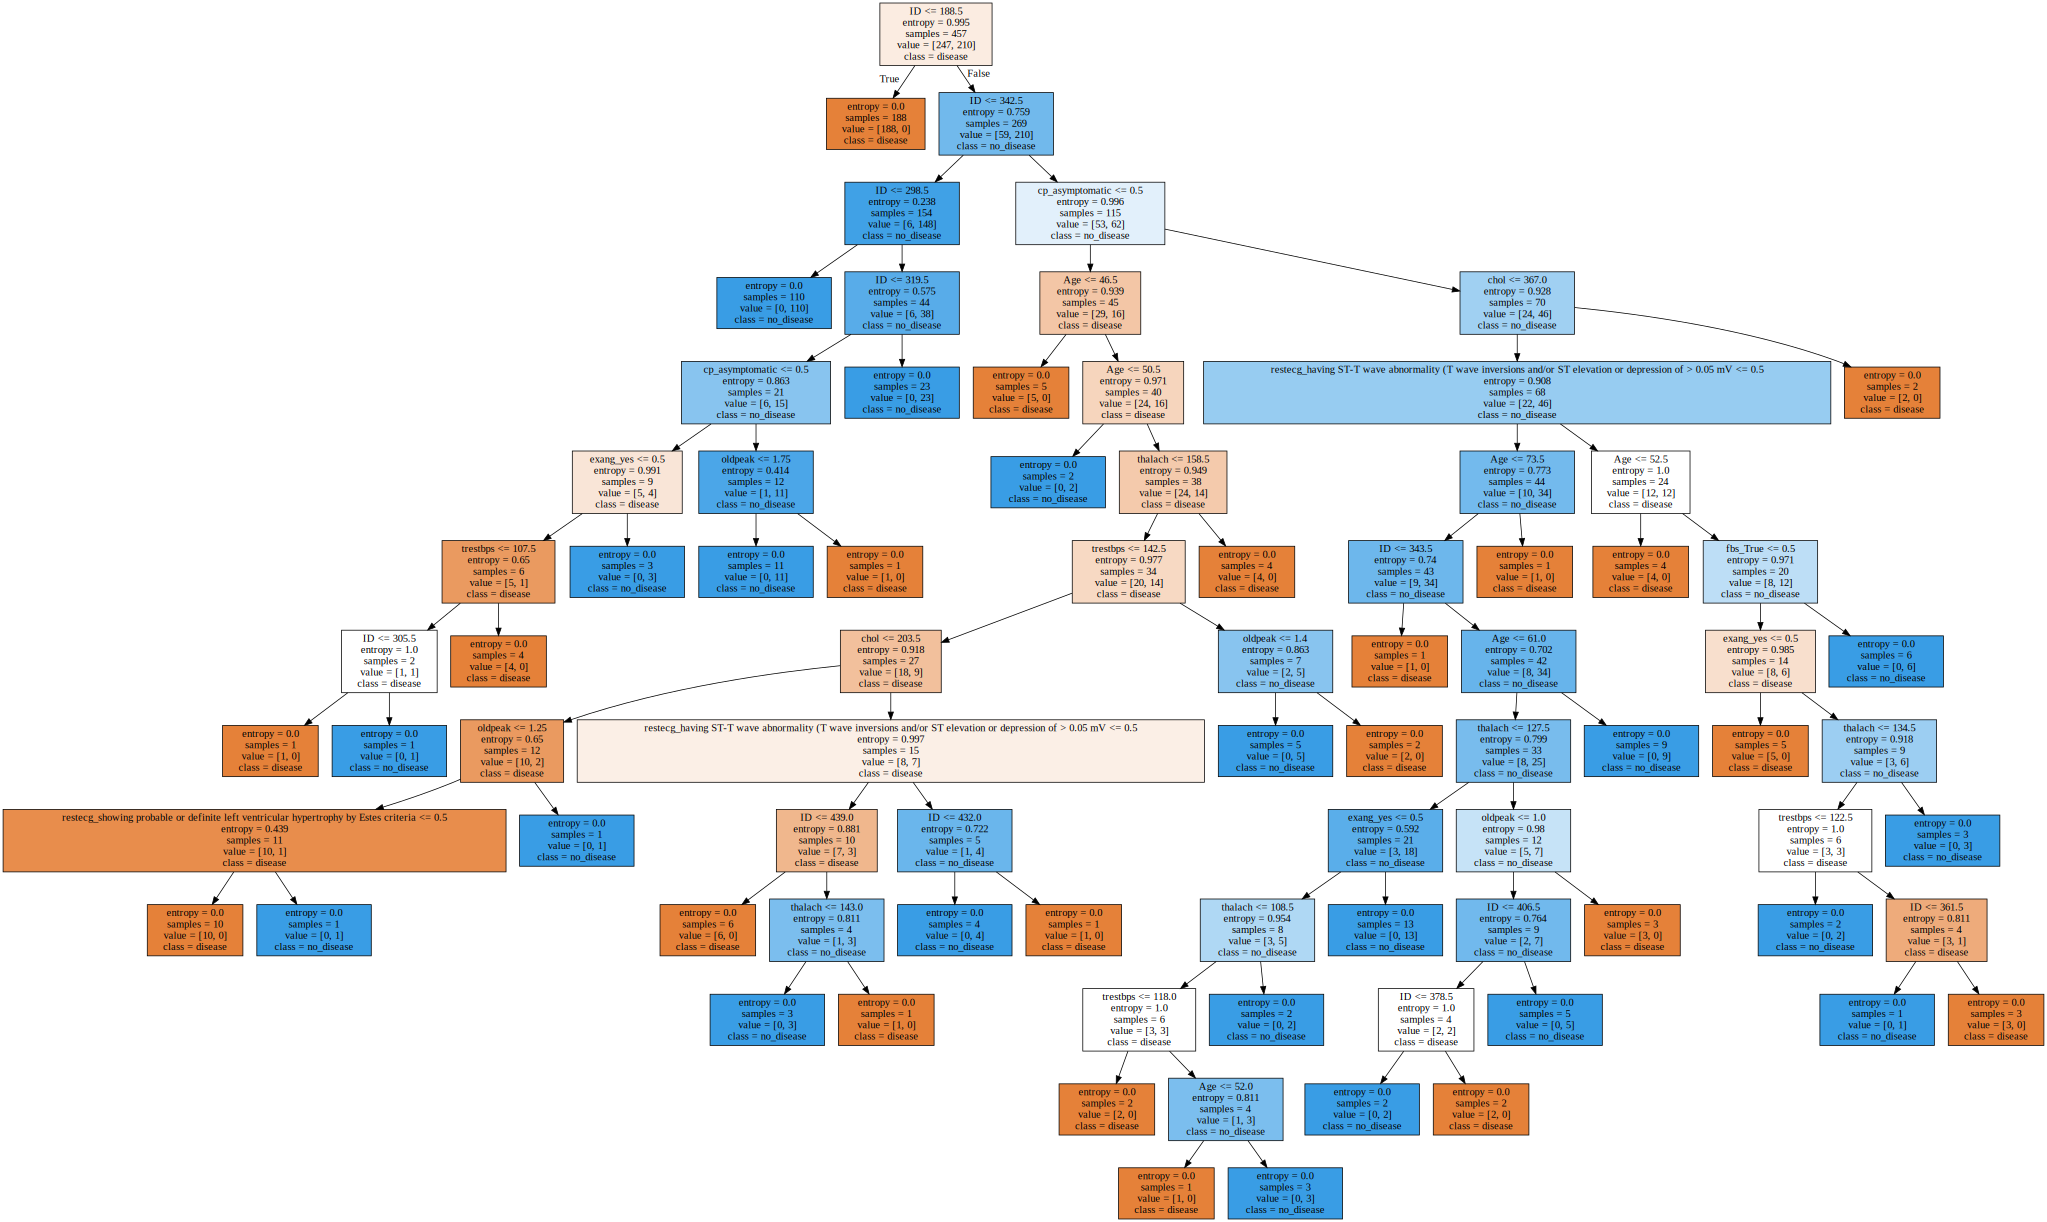

In [60]:
graph = Source(tree.export_graphviz(clf, out_file=None, feature_names=list(X), class_names=['disease', 'no_disease'], filled = True))

display(SVG(graph.pipe(format='svg')))


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [65]:
print(clf.score(X_train, y_train),clf.score(X_test, y_test))

1.0 0.8695652173913043
